# Silhouette Score

In [1]:
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [5]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)
y1_pred=single.labels_

In [6]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y2_pred=kmeans.predict(X)

Modelo 1: S_SCore=0.39287668916499374
Modelo 2: S_SCore=0.49682176129328387


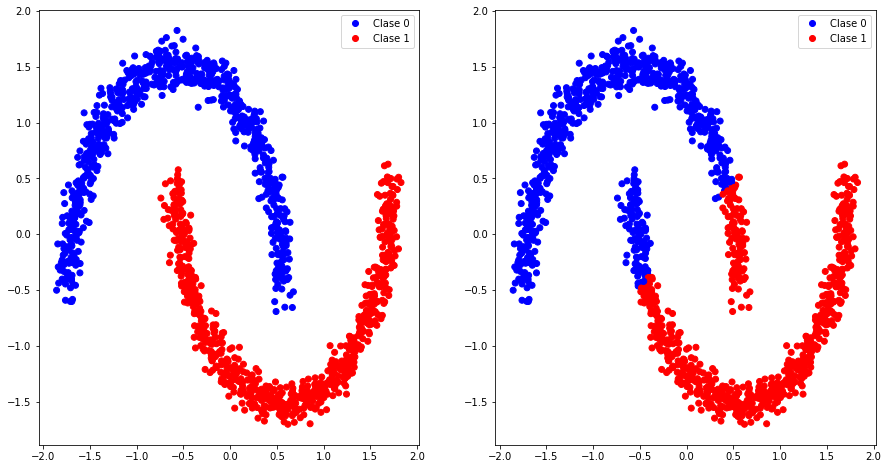

In [12]:
#plot

fig, ax=plt.subplots(1,2,figsize=(15,8))
colors=np.array(['blue', 'red'])
legend_e=[Line2D([0], [0], color=c, marker='o', linestyle='', label='Clase {}'.format(i)) for i,c in enumerate(colors)]

ax[0].scatter(X[:,0], X[:,1], color=colors[y1_pred]);
ax[0].legend(handles=legend_e, loc='upper right')

ax[1].scatter(X[:,0], X[:,1], color=colors[y2_pred]);
ax[1].legend(handles=legend_e, loc='upper right')

print ('Modelo 1: S_SCore={}'.format(silhouette_score(X, y1_pred)))
print ('Modelo 2: S_SCore={}'.format(silhouette_score(X, y2_pred)))

# Elbow

In [15]:
from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
set_matplotlib_formats('svg')

from sklearn.datasets import make_blobs

In [19]:
X,y=make_blobs(n_features=3, centers=2)

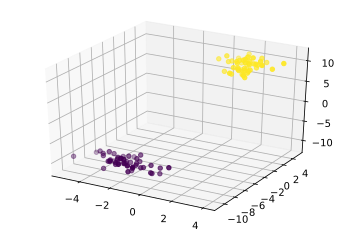

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

In [21]:
from sklearn.cluster import KMeans

n_clusters, inercia=zip(*[(k, KMeans(n_clusters=k).fit(X).inertia_) for k in range(1,10)])

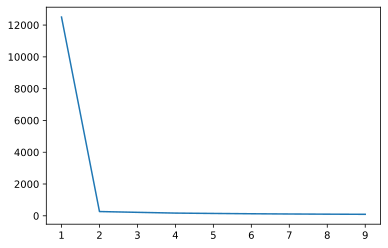

In [22]:
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [23]:
inercia

(12503.471853682357,
 269.42716801220035,
 219.8631492282324,
 172.16818864891582,
 149.7656624864019,
 130.43607128582553,
 115.2981830817425,
 104.12674370638442,
 95.5028429270881)

In [24]:
from yellowbrick.cluster import KElbowVisualizer

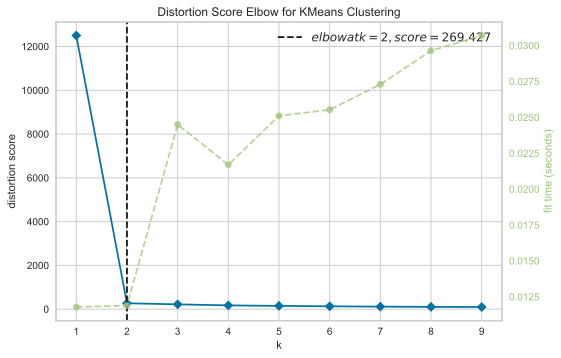

In [25]:
modelo=KMeans()
visual=KElbowVisualizer(modelo, k=(1,10))
visual.fit(X)
visual.poof();

In [26]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

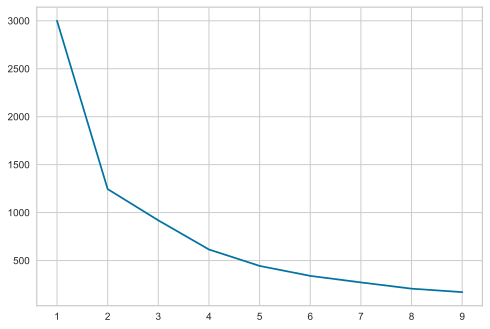

In [27]:
inercias=[]

for i in range(1,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    inercias.append(kmeans.inertia_)
plt.plot(range(1,10), inercias);

# Rand Score

In [28]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)
y1_pred=single.labels_

kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y2_pred=kmeans.predict(X)

In [29]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [30]:
from sklearn.metrics import adjusted_rand_score as ars

score1=ars(y, y1_pred)
score2=ars(y, y2_pred)

print(score1, score2)

1.0 0.4803644661791052


# Visualizacion de clusters

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [38]:
X,_=make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [39]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
y_pred=kmeans.predict(X)

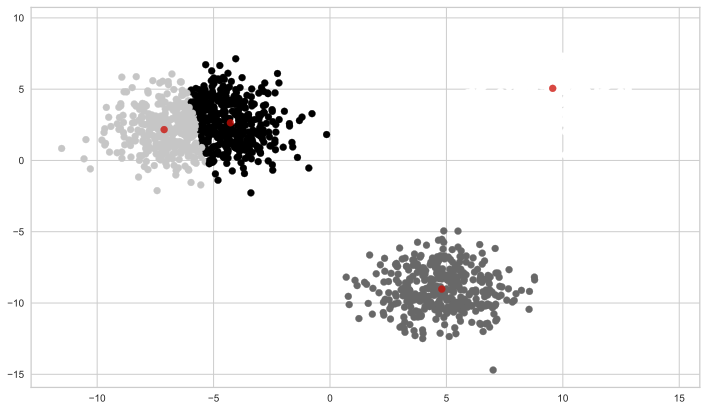

In [41]:
plt.figure(figsize=(12,7))
plt.scatter(X[:,0], X[:,1], c=y_pred);

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='r', s=50, alpha=.75);

plt.show();

In [42]:
# otro y PCA

from scipy.spatial.transform import Rotation as R

In [44]:
X,_=make_blobs(n_samples=500, n_features=2 ,centers=3, cluster_std=1.)

X=np.c_[X, .5*np.random.randn(X.shape[0], 1)]

rot=R.from_euler('y', 45, degrees=True)

X=rot.apply(X)

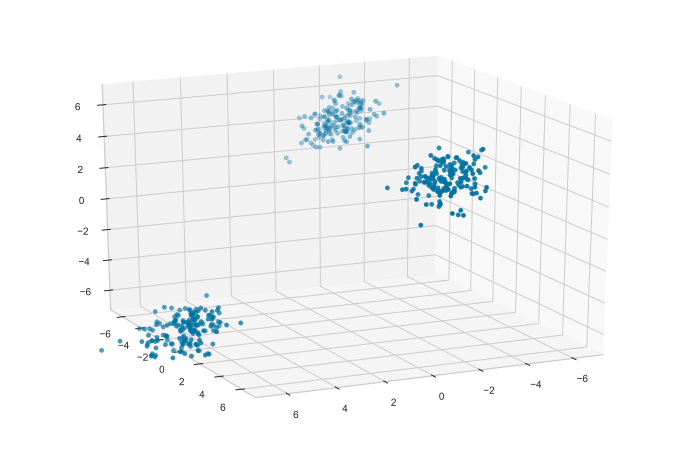

In [45]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_zlim(-7,7)

ax.view_init(elev=20, azim=65)
plt.show();

In [46]:
from sklearn.decomposition import PCA

pca=PCA().fit(X)
pca_x=pca.transform(X)

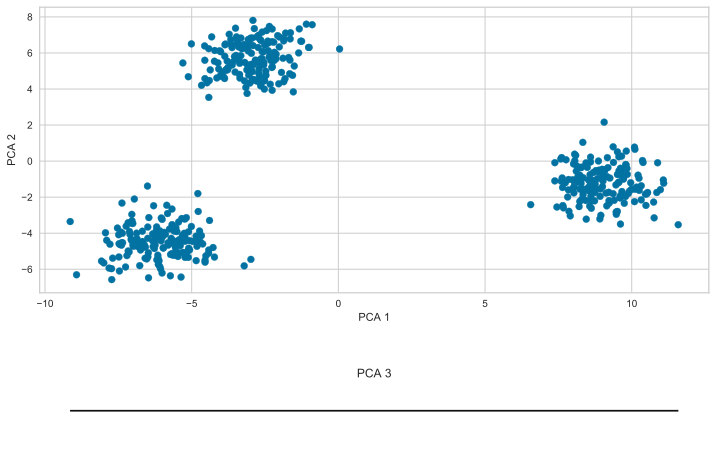

In [47]:
fig=plt.figure(figsize=(12,8))
ax=[plt.subplot2grid((6,1), (0,0), rowspan=4), plt.subplot2grid((6,1), (5,0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])
ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

In [48]:
# T-SNE

from sklearn.manifold import TSNE

X,y=datasets.load_iris(return_X_y=True)

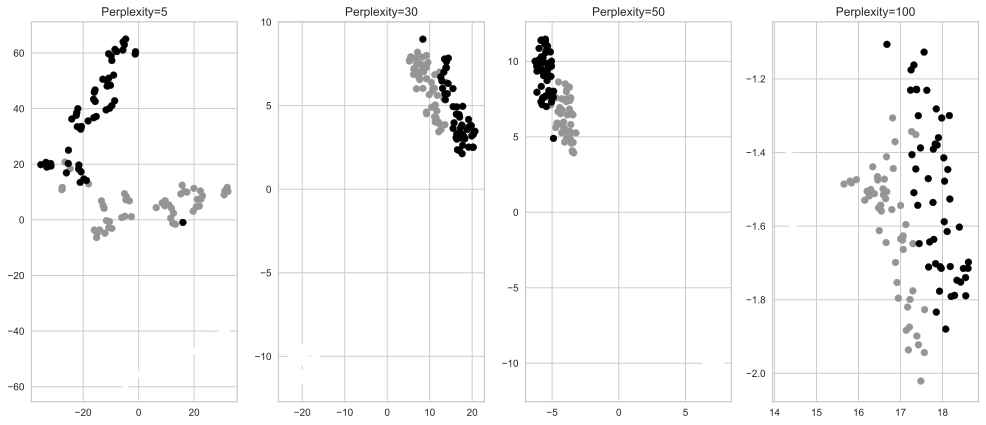

In [49]:
fig, ax=plt.subplots(1, 4, figsize=(17,7))

for i, p in enumerate([5, 30, 50, 100]):
    tsne=TSNE(perplexity=p)
    x_emb=tsne.fit_transform(X)
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();